# Generic Real Estate Consulting Project
Group number:26 <br/>
Group members:  <br/>
Xuechun Cheng <xueccheng@student.unimelb.edu.au>
Joel Antony   <jantony@student.unimelb.edu.au>
Mingqi Liu    <mingqil@student.unimelb.edu.au>
Yuchen Zhong  <yuchzhong@student.unimelb.edu.au>

 
**This notebook is a summary of the following topics:**
1. The features we used
2. The Models we fit
3. The results we achieved
4. Issues that we have run into, and the limitations/assumptions you we along the way

# 1.Data collection by Scraping
##### A comprehensive web scraping script designed to extract property information from the Domain website (domain.com.au). It includes several functions for fetching property details, extracting URLs, and converting the extracted data into a CSV file. Below is a detailed summary of each part of the code: 
1.Scrape suburbs and postcode.ipynb
<https://github.com/MAST30034-AppliedDataScience/project-2-group-real-estate-industry-project-26/blob/35891f6f52e0d49267c05a9e8b3a996409a879cf/notebooks/1.Scrape%20suburbs%20and%20postcode.ipynb>
2.Scrape Domain.ipynb
<https://github.com/MAST30034-AppliedDataScience/project-2-group-real-estate-industry-project-26/blob/35891f6f52e0d49267c05a9e8b3a996409a879cf/notebooks/2.Scrape%20Domain.ipynb>
3.scrape-additional.ipynb
<https://github.com/MAST30034-AppliedDataScience/project-2-group-real-estate-industry-project-26/blob/35891f6f52e0d49267c05a9e8b3a996409a879cf/notebooks/3.scrape-additional.ipynb>

#### 1.1 Data collected by Scrape:
<table border="2" class="dataframe"> <thead> <tr style="text-align: right;"> 
<td></th> <th>Property Inherent Info:</th> <td></td> <th>External Elements:</th> </tr> </thead> <tbody>
 <tr><td>1</td> <th>Price(num)</th> <td>11</td> <th>Parkings nearby(num)</th> </tr> 
<tr> <td>2</td> <th>Number of bathrooms(num)</th> <td>12</td> <th> Schools nearby </th> </tr> 
<tr> <td>3</td> <th>Number of bedrooms(num)</th> <td>13</td> <th>Local age distribution(num)</th> </tr> 
<tr> <td>4</td> <th>Property type</th><td>14</td> <th>Hospitals Nearby(num)</th> </tr> 
<tr> <td>5</td> <th>Agency</th><td>15</td> <th>Malls Nearby(num)</th> </tr> 
 <tr> <td>6</td> <th>Locality</th> <td>16</td> <th>Parks nearby(num)</th> </tr>
 <tr> <td>7</td> <th>NBN type</th><td>17</td> <th>Tram/Train Stops nearby(num)</th> </tr>
 <tr> <td>8</td>  <th>Geo coordinates</th><td></td> <td></td></tr>
 <tr> <td>9</td>  <th>postalCode(num)</th> <td></td> <td></td></tr>
 <tr> <td>10</td>  <th>Property Type</th> <td></td> <td></td></tr>
  </tbody> </table>
  

### 1.2  Web scraping, Data manipulation and File handling

Key Steps & Approach:

HTTP Request: Sends a request to the URL with a user-agent header to mimic a browser request.
BeautifulSoup: Parses the HTML content of the response.
JSON-LD Data: Extracts JSON-LD data embedded in the HTML.
Digital Data: Extracts JavaScript variable digitalData which contains structured property information.

Link Extraction: Extracts property URLs from anchor tags (<a>) that match a specific pattern.
Error Handling: Catches and prints errors related to HTTP requests and JSON decoding.
### 1.2.1 Web scraping on Domain
 Issue:  Domain.com.au likely has rate limiting and anti-scraping measures in place.
Treatment: with a user-agent header to mimic a browser request;Implement exponential backoff and rotating user agents. Add delays between requests and use proxy servers to distribute requests.
 Function: extract_property_info(url)
 
##### Assumption & Limitation: This web scraping script for Domain.com.au assumes consistent website structure and data availability, but lacks robust error handling, rate limiting, and scalability features, potentially leading to incomplete data collection and vulnerability to website changes or blocking. The property list in the domain website only displays a maximum of 2000 properties at a time. In order to ensure that enough properties can be captured, we change the classification condition from property type to suburb. In this way, around 80% of properties can be captured. The remaining 20% cannot be captured because there are more than 2,000 properties in the area. Such an approach increases the running cost of the code, making it impossible to make more detailed classifications.


### 1.2.2 Scraping additional information from external website 
<table border="1" class="dataframe"> 
<tr> <td>GeoNames geographical database: </td> <th>Geo coordinates</tr> 
<tr> <td>Vicparks:</td> <th> Parkings nearby</tr> 
<tr> <td>Victorian Agency for Health:</td> <th>Hospitals Nearby</tr> 
<tr> <td>Wikipedia: </td> <th>Train Stops nearby, Malls Nearby</tr> 
  </tbody> </table>
  

Issue:  We realize the data sources are not reliable and complete sometimes. For example, Wikipedia offers list of train stops, but some stops are out of use, the data are not up in date
Treatment: We planned to download the latest data source from official governmental websites; and use realtime API to compute or collect data.
##### Assumption & Limitation: All the information from commercial websites is reliable, and no information is made up.

# 1.3 Data preprocessing and standardization

Based on the Data Preprocessing notebook provided, here are some key issues it addresses, how it fixes them, and some limitations/assumptions:

##### 1.3.1 Dealing with missing and inconsistent data

How it's fixed:
The code handles missing values in various columns, particularly for features like 'bedrooms', 'bathrooms', 'parking', and 'price'. It fills missing numeric values with 0 and drops rows with missing critical information like price, address, and property type.

```python
property_df[['bedrooms', 'bathrooms', 'parking']] = property_df[['bedrooms', 'bathrooms', 'parking']].fillna(0)

property_df = property_df.dropna(subset=['price', 'streetAddress', 'addressLocality', 'postalCode', 
                                         'geo', 'property_type'])
```

##### Assumption & Limitation:
- Filling missing numeric values with 0 assumes that the absence of information means the property doesn't have that feature, which may not always be accurate.
- Dropping rows with missing critical information could potentially remove valuable data points if the missing information is due to data collection issues rather than actual absence of the feature.

##### 1.3.2. Standardize Inconsistent price/ date formats

How it's fixed:
The code uses a custom function `clean_price()` to standardize price information. It handles various formats (weekly, monthly) and converts all prices to a weekly basis.

```python
def clean_price(price):
    # ... (code to extract and standardize price)
    if match.group(2) and ('m' in match.group(2).lower() or 'month' in match.group(2).lower()):
        price_value /= 4.3  # Assumes a month has 4.3 weeks on average
    return round(price_value, 2)
```

##### Assumption & Limitation:

We assume that the prices of the property are not all in a uniform format, which may include per week or per month, so we divide all prices in monthly units by 4.3 to get the weekly price.

These preprocessing steps help to create a more consistent and usable dataset for further analysis. However, the assumptions made during this process could introduce biases or inaccuracies in the final dataset, which should be considered when interpreting results or making decisions based on this data.

##### Note: This step is only about the data collect from scraping, we also collected more data by API(in next step) and downloaded from websites, which can not show steps on python

# 2.Data Preprocess and Computing inferred data
##### We collected all the raw data we thought of, and some further data are also valuable, like distances to the nearest tarm stops. These data will be calculated in this part, through an intelligent way,like using Google Map API to check the distance in reality, not simply calculate relative geographical distance.
notebooks/4.Data Preprocessing.ipynb
<https://github.com/MAST30034-AppliedDataScience/project-2-group-real-estate-industry-project-26/blob/35891f6f52e0d49267c05a9e8b3a996409a879cf/notebooks/4.Data%20Preprocessing.ipynb>
##### We collected some external data by highly reliable sources: 

①Victorian Government open data
<https://discover.data.vic.gov.au/dataset/ptv-metro-tram-stops>
<https://discover.data.vic.gov.au/dataset/vicmap-features-of-interest-rest-api>
②Crime Statistics Agency Victoria 
<https://www.crimestatistics.vic.gov.au/crime-statistics/latest-crime-data-by-area>
③Australian Bureau of Statistics
<https://www.abs.gov.au/statistics/people/population/regional-population/latest-release>

##### Compute and deduce data by intelligent API tools:
①Google Map API
<https://maps.googleapis.com/maps/api/distancematrix/json>
②Australia Post API
<https://digitalapi.auspost.com.au/postcode/search.json>
③Open Route Service API
<https://api.openrouteservice.org/v2/directions/{profile}>


### 2.1 Data collected and computed by external sources:

<table border="2" class="dataframe"> <thead> <tr style="text-align: right;"> 
<tr><th>hospital_count</th><th>	park_count</th><th>	station_count</th><th>	shopping_cen_count	</tr>
<tr><th>dist_melb_cen</th><th>	distance_to_nearest_stop	</th><th>	</th><th></tr>
<tr><th>A_crime_count</th><th>B_crime_count</th><th>C_crime_count</th><th>D_crime_count	</tr>
<tr><th>other_crime_count</th><th>total_crime_count</th><th>Crime_Count_2014to2024	</th><th>Crime_Rate_2014to2024	</th></tr>
  </tbody> </table>
  
2.1.1 Count the number of buildings nearby properties: hospitals, parks, shopping mall, train stations
2.1.2 Distance to Melb Central; Distance to the nearest tram stops by Google Map calculation
2.1.3 A B C D Crime cases reported in each suburb(LGA), A to D stands for emergency cases to less emergency
2.1.4 Crime count of total reports; the ratio of cases per million population; also the historic records of them in past 10 years

### 2.2 Data downloading
<table>
<tr><td>Victorian Government open data :</th><th> Train and tram stations/stops; zoo, gardens, parks and hospital in Victoria</th></tr>
<tr><td>Crime Statistics Agency Victoria : </th><th>Criminal count and criminal rate in the past 10 years </th></tr>
<tr><td>Australian Bureau of Statistics : </th><th> Population and components of change (births, deaths, migration) in Victoria</th></tr>
</tbody> </table>

### 2.3 Compute and deduce data 

①Google Map API : 1.Search the walking or driving distances to property in realtime (not absolute distance by geo coordinates); 2. Search the location, open time of malls and parks around.
②Australia Post API: Search which postcodes and Local Government Area that the buildings (hospitals, properties and so on) belong to.
③Open Route Service API: Calculate the distance of properties to Melbourne Central

Issue: The script running and requiring Google Map API, are interrupted by Internet (or servers) issue, or used up to requiring limitation on that day (100'000 times)
Treatment: We changed the algorithm, and reduced the requiring times into 3*(8000), (8000 properties). 
We calculate the top 3 nearest train and tram station to the properties in absolute distance by geo coordinates, and require the walking distance on Google Map, to find the distance to the closest train or tram stops.


##### Assumption: Consoler has enough budget of APIs using fee; and Internet or API's server always work functionally without long delay.
##### Limitation: Requiring Commercial APIs like Google map, would generally cost money; and Internet or Google's server shell always work functionally without long delay. When using apis to find the distance of a property to a key location, quota of 500 API requests per day and the call rate of 40 per minute makes the code run less efficiently.

# 3.Data cleaning
#####  While we collected data, we cleaned some missing Na featured data, outliers and so on in data preprocessing. Calculating totals and medians of rental prices, and aggregating information by suburb, year, and property type.


notebooks/4.Data Preprocessing.ipynb
<https://github.com/MAST30034-AppliedDataScience/project-2-group-real-estate-industry-project-26/blob/35891f6f52e0d49267c05a9e8b3a996409a879cf/notebooks/4.Data%20Preprocessing.ipynb>
notebooks/5.past_data_clean.ipynb
<https://github.com/MAST30034-AppliedDataScience/project-2-group-real-estate-industry-project-26/blob/35891f6f52e0d49267c05a9e8b3a996409a879cf/notebooks/5.past_data_clean.ipynb>

##### 3.1 Issue: Inconsistent data structure across multiple sheets
How it's fixed:
The code reads data from multiple sheets in an Excel file and standardizes the structure by:
- Removing unnecessary columns and rows
- Renaming columns consistently
- Merging data from all sheets into a single DataFrame

```python
for sheet_name in xlsx.sheet_names:
    df = pd.read_excel(xlsx, sheet_name=sheet_name, header=1)
    df = df.iloc[:, 1:]
    df = df.drop(0, axis=0)
    
    df.columns = ['Suburb'] + df.columns[1:].tolist()
    
    # ... (more column renaming and restructuring)
    
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)
```

##### Assumption & Limitation:
- Assumes all sheets have a similar structure with consistent column positioning
- May not handle unexpected variations in sheet layouts or column names

##### 3.2 Issue: Calculation of "Other properties" data
Inconsistent naming conventions, handles the 'All properties' category by creating an 'Other properties' group

How it's fixed:
The code calculates values for "Other properties" by subtracting the sum of specific property types from the total for all properties:

```python
new_count['Count'] = new_count.get('properties', 0) - new_count.drop(columns=['properties'], errors='ignore').sum(axis=1)
new_price['Total_Price'] = new_price.get('properties', 0) - new_price.drop(columns=['properties'], errors='ignore').sum(axis=1)
```
##### Assumption & Limitation:
- Assumes that the difference between "All properties" and the sum of specific property types represents "Other properties"
- This approach might introduce inaccuracies if there are any data inconsistencies or if the "All properties" category includes anything beyond the sum of individual categories

These preprocessing steps help to create a more consistent and usable dataset from complex, multi-sheet Excel data. However, the assumptions made during this process could potentially introduce errors or misrepresentations in the final dataset, particularly in the calculation of "Other properties" data. It's important to validate these assumptions and potentially cross-check the results with the original data source to ensure accuracy.


# 4.Modeling for House Price Prediction 
notebooks/6.Visualisation.ipynb
<https://github.com/MAST30034-AppliedDataScience/project-2-group-real-estate-industry-project-26/blob/main/notebooks/6.Visualisation.ipynb>
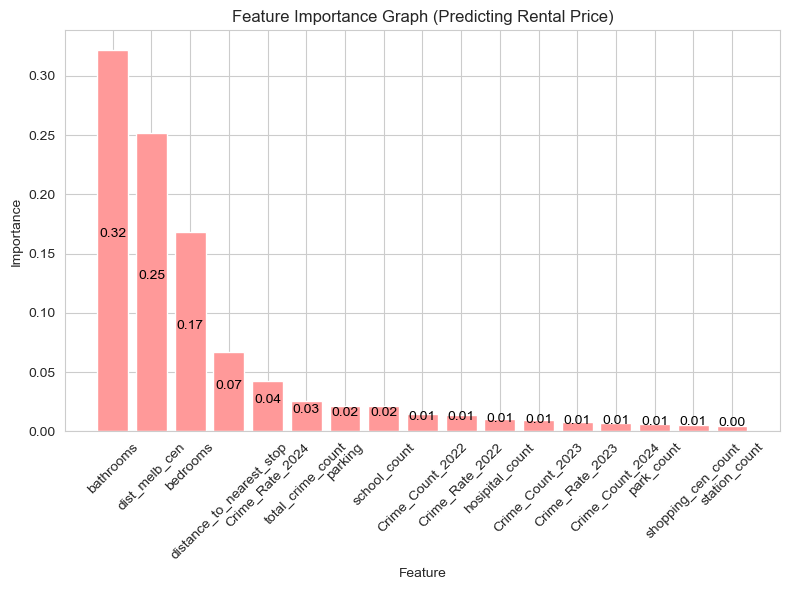
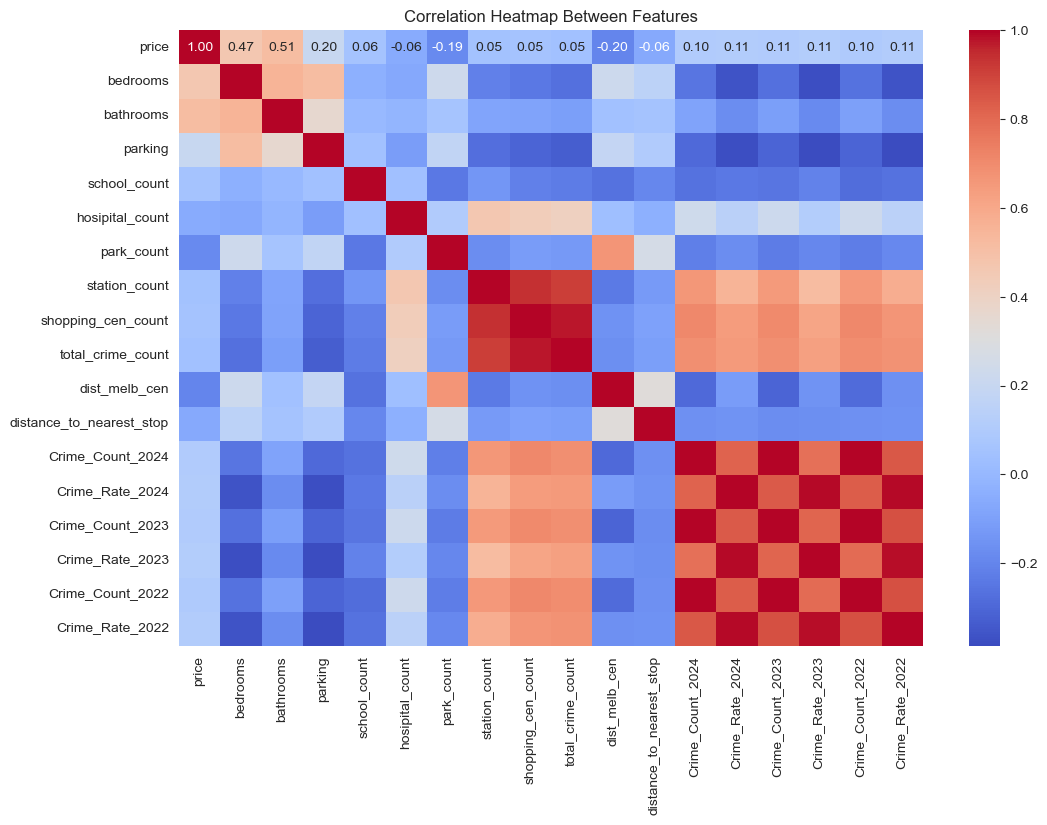

##### Identifying important features in the dataset that influence a target variable, likely price, using a Random Forest model. The steps toward solving this problem by training a model (like a Random Forest) to determine which features have the most influence on property prices or other dependent variables.

##### 4.1 Growth rate by calculating the average and using the same as a benchmark
```python
result['Median'] = result['Total_Price'] / result['Count']
result['Growth_Rate'] = result['Median'].pct_change().dropna()
```
##### Assumption & Limitation:
- Outliers could not be deleted because the price of each property in each area was not known.
- The growth rate received an impact due to the external sudden and rare factor of covid-19.
- It is the average that is used in order to facilitate the training of our model later on, the data maintains its accuracy as much as possible to reduce bias, making comparisons between different regions or samples fairer.

##### 4.2 Model selection for price prediction
Random Forests can handle complex, non-linear relationships between features (like property characteristics and crime rates) and is robust against overfitting by averaging the predictions of many decision trees. It also provides feature importance, helping identify which factors most influence the target variable (e.g., property price).

##### Limitation:
- Model Assumption:
The Random Forest model assumes there is a clear relationship between the features and the target variable. However, it may not capture complex interactions without careful tuning or additional preprocessing.
- Interpretability:
While Random Forests provide feature importance scores, these scores do not necessarily reflect causal relationships. Features might be highly correlated, and the model could misattribute importance.
- Dataset Quality:
If the dataset contains incomplete or inaccurate data, the model’s predictions and feature importance results could be skewed.
Handling Time-Series Data:
If the crime count features across years represent a time-series trend, using a Random Forest may not fully capture temporal dependencies since it does not explicitly handle time-series relationships.
##### Assumption :
- Data Quality:
It assumes that the input data is clean and preprocessed correctly. Missing values, outliers, or noise could affect the model's performance and the accuracy of feature importance scores.
Feature Independence:
The Random Forest model assumes that the features are relatively independent. High correlations between features can lead to misleading interpretations of feature importance.

# 5. the most liveable and affordable suburbs 
notebooks/6.Visualisation.ipynb
<https://github.com/MAST30034-AppliedDataScience/project-2-group-real-estate-industry-project-26/blob/main/notebooks/6.Visualisation.ipynb>
##### This file contains how do we evaluate the most liveable and affordable suburbs in lower part. We weighted the feature influences in affordable index by following statistic.
<https://economy.id.com.au/melbourne/household-expenditure?sEndYear=2022>
##### It shows the evidence support we offer weight to Affordable Index = Housing*19.9%+Food*10.0%+Transport*10

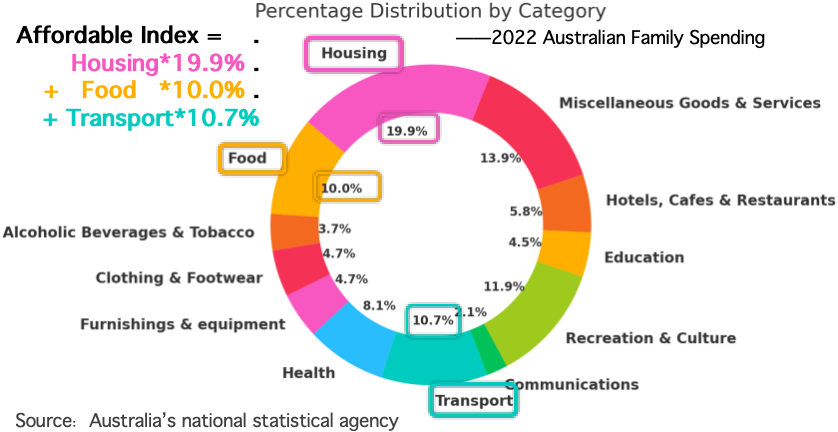

##### Issue: The index and ranking for top10, is not universal suitable for every family
##### Assumption & Limitation: Client family matches the target customer we set. Every suburb population data can be representative to this area.

# 6 House Price Growth Prediction

 ##### The data is aggregated by locality to calculate total prices, followed by merging with another dataset that includes past real estate transactions. This merged dataset is further refined to calculate median prices and prepare for geographic analysis.
  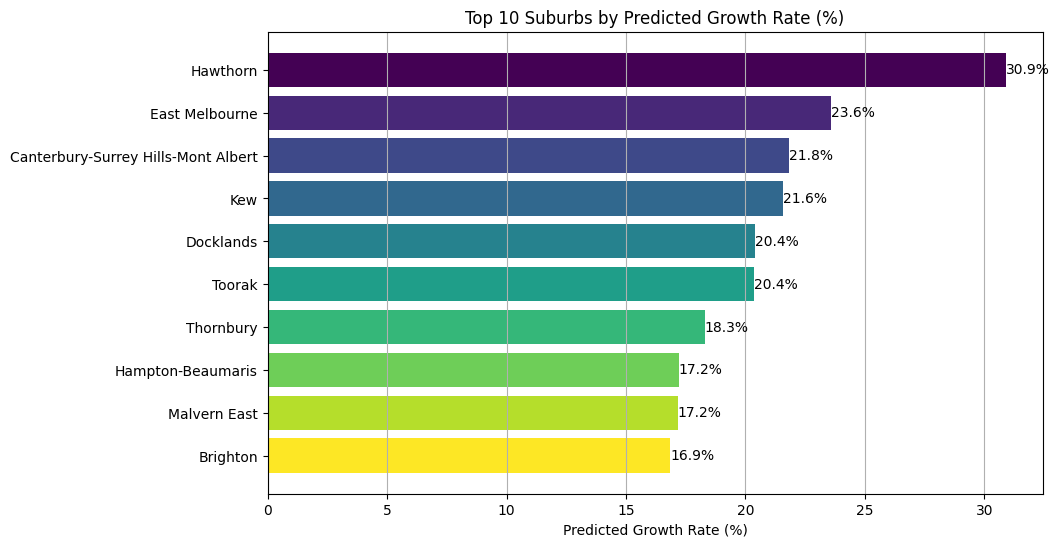
  
##### Limitations:
- Data Completeness and Accuracy: The reliability of the total and median price calculations heavily depends on the completeness and accuracy of the input datasets. Any missing or incorrectly recorded transactions can skew the results, especially in smaller or less active localities.
- Temporal Dynamics: The analysis does not account for the temporal variation in property prices, which can be significant due to economic cycles, changes in interest rates, or local developments. Without considering the timing of transactions, the aggregated prices might not reflect current market conditions.

##### Assumptions:
- Homogeneity within Localities: The analysis assumes that all areas within a given locality have similar property price dynamics, which might not be the case, especially in diverse urban or rural settings.
- Stable Market Conditions: It implicitly assumes that past price data is a reliable indicator of current or future values, disregarding potential market changes or external economic impacts.




6.2 Interface map for Price Growth Rate Prediction
##### The notebook also includes complex geographic data handling, where it merges real estate data with geographical information and generates an interactive map using Folium. This map visualizes predicted growth rates across different localities, highlighting areas with different growth potentials based on color-coded regions. The entire process emphasizes data cleaning, aggregation, and the use of visual tools to interpret real estate market trends effectively.
##### While client zooms in or out, it gives them detail such as hospital, grocery in this area; and growth rate in color of heat map

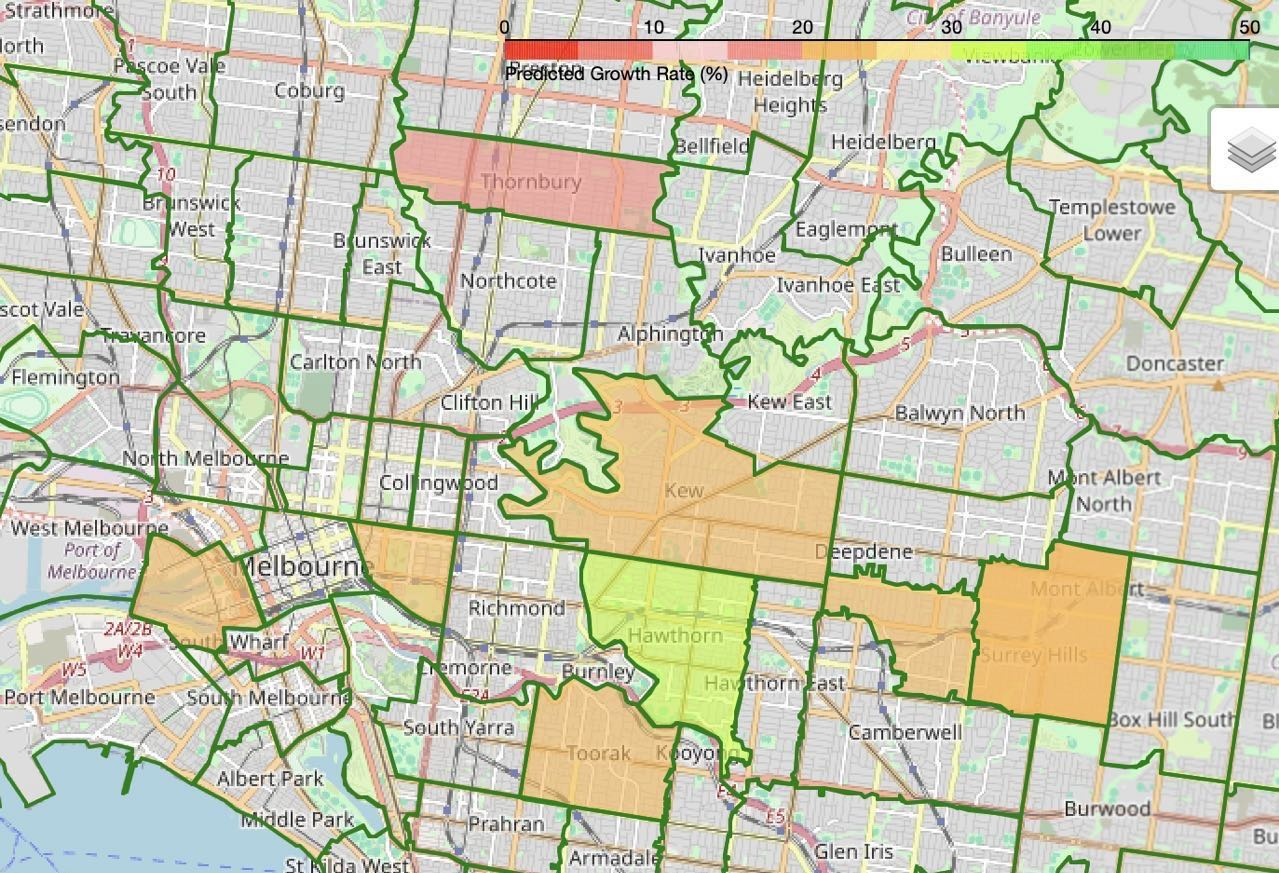

 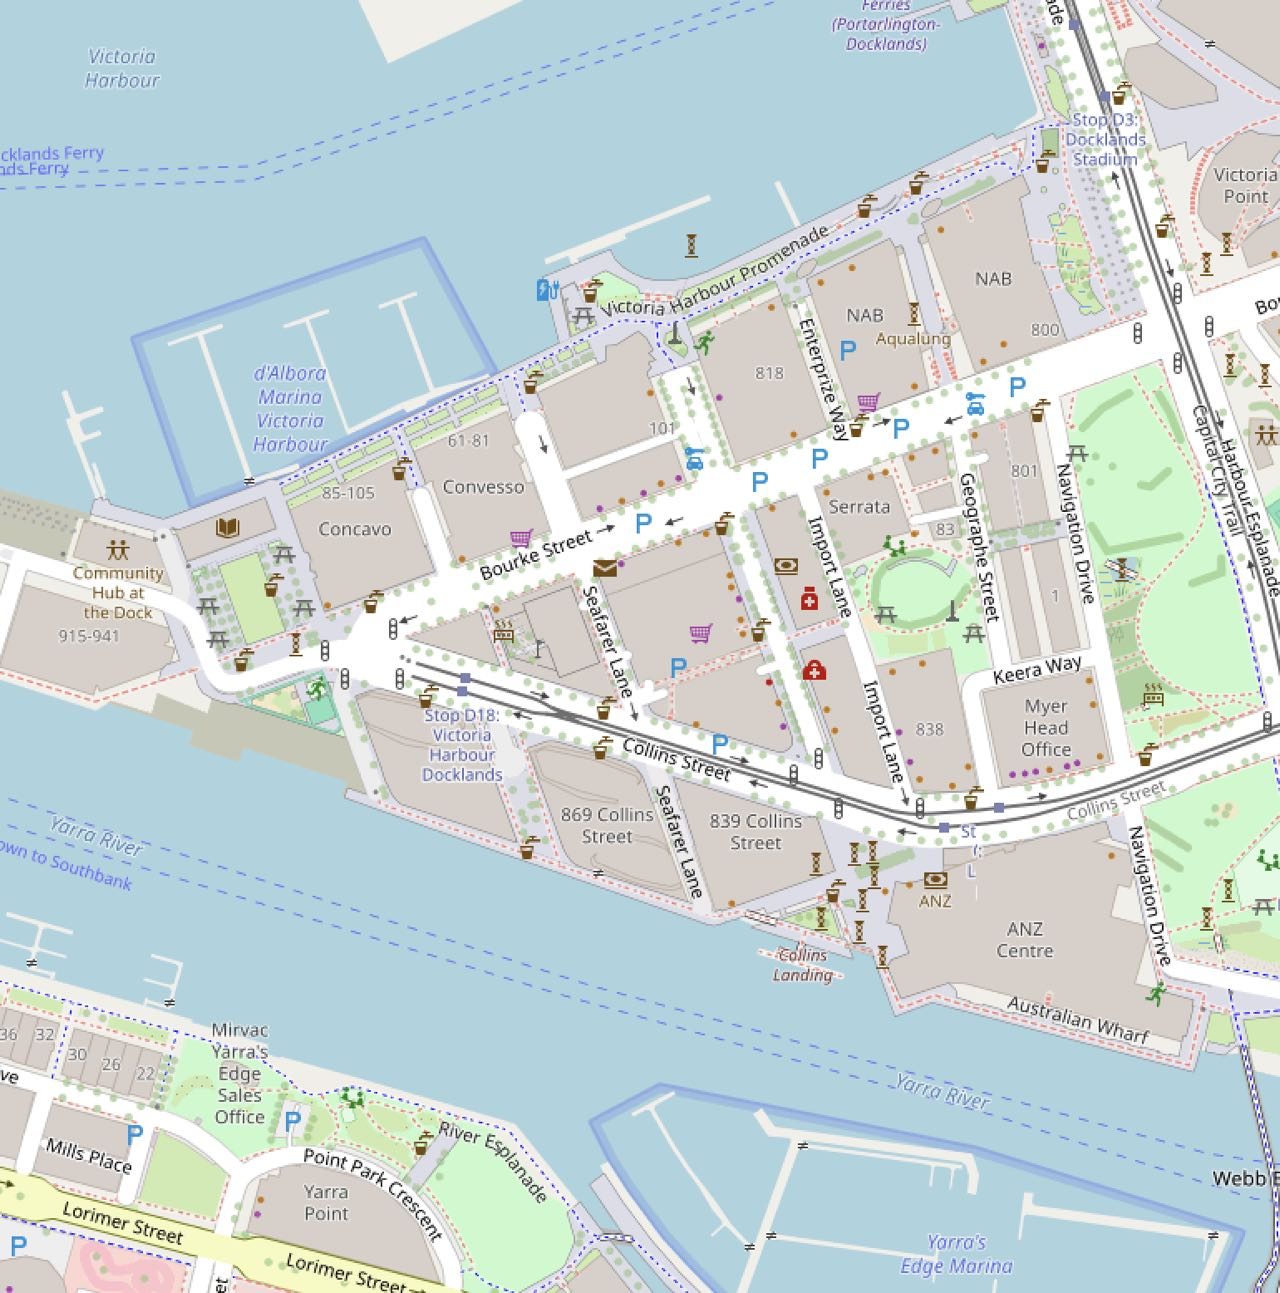

##### Limitations:
- Geographic Specificity: The granularity of locality data affects the precision of geographic analysis. If localities are too broadly defined, it may mask significant variations in property prices within those areas. Conversely, very finely divided localities may lead to data sparsity, making it hard to draw meaningful conclusions.
- Merging Errors: Potential discrepancies in how localities are named or categorized between different datasets can lead to errors during the merging process, resulting in missing or duplicated data.

##### Assumptions:
- Accuracy of Data Sources: The methodology relies on the assumption that the data sources used are accurate and representative of the real estate market across different localities.
- Consistency in Data Recording: The calculation of median prices assumes that the way prices are recorded and reported is consistent across both datasets. Differences in how transaction prices are recorded (e.g., inclusion of taxes and fees) can affect the calculated medians.